<a href="https://colab.research.google.com/github/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/blob/SPRC/SPRC_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## to Install

In [1]:
# pip install TA-Lib

# For Colab
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
!pip install ta

--2024-01-09 16:35:11--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-09 16:35:11--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-09 16:35:11--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

## to Import

In [2]:
# Import the Libraries

# Data Manupulation
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime, timedelta

# Techinical Indicators
import talib

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization
from sklearn.preprocessing import MinMaxScaler

# Machine learning
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Stock Data

## SPRC

### 5m

In [47]:
# SPRC 5m
stock_symbol = 'SPRC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SPRC_5m_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SPRC_5m_df = pd.concat([SPRC_5m_df, data])

# Reset the index to get Date as a column
SPRC_5m_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SPRC_5m_df)

# Save the DataFrame to a CSV file
SPRC_5m_df.to_csv('data_SPRC_5m.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,7.75,7.75,7.65,7.70,7.70,0
1,5m,2023-11-13 10:05:00+07:00,7.70,7.70,7.65,7.70,7.70,30200
2,5m,2023-11-13 10:10:00+07:00,7.70,7.70,7.60,7.65,7.65,248104
3,5m,2023-11-13 10:15:00+07:00,7.60,7.70,7.60,7.70,7.70,428700
4,5m,2023-11-13 10:20:00+07:00,7.70,7.70,7.70,7.70,7.70,2700
...,...,...,...,...,...,...,...,...
1927,5m,2024-01-08 16:05:00+07:00,8.45,8.45,8.40,8.40,8.40,25400
1928,5m,2024-01-08 16:10:00+07:00,8.40,8.45,8.40,8.45,8.45,500800
1929,5m,2024-01-08 16:15:00+07:00,8.45,8.45,8.45,8.45,8.45,2659
1930,5m,2024-01-08 16:20:00+07:00,8.45,8.45,8.40,8.45,8.45,112601


### 15m

In [48]:
# SPRC 15m
stock_symbol = 'SPRC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
SPRC_15m_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SPRC_15m_df = pd.concat([SPRC_15m_df, data])

# Reset the index to get Date as a column
SPRC_15m_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SPRC_15m_df)

# Save the DataFrame to a CSV file
SPRC_15m_df.to_csv('data_SPRC_15m.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 10:00:00,7.75,7.75,7.60,7.65,7.65,278304
1,15m,2023-11-13 10:15:00,7.60,7.70,7.60,7.65,7.65,604209
2,15m,2023-11-13 10:30:00,7.60,7.65,7.55,7.65,7.65,1756301
3,15m,2023-11-13 10:45:00,7.65,7.65,7.55,7.60,7.60,362500
4,15m,2023-11-13 11:00:00,7.55,7.60,7.55,7.60,7.60,1048500
...,...,...,...,...,...,...,...,...
677,15m,2024-01-08 15:15:00,8.45,8.45,8.40,8.40,8.40,228000
678,15m,2024-01-08 15:30:00,8.40,8.45,8.40,8.45,8.45,195000
679,15m,2024-01-08 15:45:00,8.40,8.50,8.40,8.45,8.45,904000
680,15m,2024-01-08 16:00:00,8.45,8.45,8.40,8.45,8.45,569601


In [49]:
#Add Y
# Shift the 'Close' column up by one row
SPRC_15m_df['Close_Shifted'] = SPRC_15m_df['Close'].shift(-1)

# Add a new column 'Signal' based on the condition
SPRC_15m_df['Signal'] = np.where(SPRC_15m_df['Close_Shifted'] > SPRC_15m_df['Close'], 2,
                        np.where(SPRC_15m_df['Close_Shifted'] < SPRC_15m_df['Close'], 1, 0))

# Display the resulting DataFrame with the new columns
display(SPRC_15m_df)

,Interval,Date,Open,High,Low,Close,Adj Close,Volume,Close_Shifted,Signal
0,15m,2023-11-13 10:00:00,7.75,7.75,7.60,7.65,7.65,278304,7.65,0
1,15m,2023-11-13 10:15:00,7.60,7.70,7.60,7.65,7.65,604209,7.65,0
2,15m,2023-11-13 10:30:00,7.60,7.65,7.55,7.65,7.65,1756301,7.60,1
3,15m,2023-11-13 10:45:00,7.65,7.65,7.55,7.60,7.60,362500,7.60,0
4,15m,2023-11-13 11:00:00,7.55,7.60,7.55,7.60,7.60,1048500,7.60,0
...,...,...,...,...,...,...,...,...,...,...
677,15m,2024-01-08 15:15:00,8.45,8.45,8.40,8.40,8.40,228000,8.45,2
678,15m,2024-01-08 15:30:00,8.40,8.45,8.40,8.45,8.45,195000,8.45,0
679,15m,2024-01-08 15:45:00,8.40,8.50,8.40,8.45,8.45,904000,8.45,0
680,15m,2024-01-08 16:00:00,8.45,8.45,8.40,8.45,8.45,569601,8.45,0


# Features Data

## FX RATE USD-THB

In [6]:
# # USD 15m
# stock_symbol = 'THB=X'
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
# intervals = ['15m']

# # Create an empty DataFrame to store the results
# USD_df = pd.DataFrame()

# # Loop through each interval and append data to the DataFrame
# for interval in intervals:
#     data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
#     # Add a level to the MultiIndex for the interval
#     data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
#     USD_df = pd.concat([USD_df, data])

# # Reset the index to get Date as a column
# USD_df.reset_index(inplace=True)

# # Display the resulting DataFrame
# display(USD_df)

# # # Save the DataFrame to a CSV file
# # USD_df.to_csv('data_USD.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 00:00:00,36.073002,36.104000,36.060001,36.089001,36.089001,0
1,15m,2023-11-13 00:15:00,36.090000,36.092999,36.060001,36.060001,36.060001,0
2,15m,2023-11-13 00:30:00,36.074001,36.080002,36.060001,36.076000,36.076000,0
3,15m,2023-11-13 00:45:00,36.076000,36.077999,36.000000,36.035999,36.035999,0
4,15m,2023-11-13 01:00:00,36.035000,36.035000,35.959999,35.959999,35.959999,0
...,...,...,...,...,...,...,...,...
3713,15m,2024-01-08 22:45:00,34.915001,34.959999,34.915001,34.919998,34.919998,0
3714,15m,2024-01-08 23:00:00,34.950001,34.959999,34.890999,34.928001,34.928001,0
3715,15m,2024-01-08 23:15:00,34.931000,34.950001,34.910000,34.929001,34.929001,0
3716,15m,2024-01-08 23:30:00,34.931000,34.950001,34.919998,34.938999,34.938999,0


## CNYX

In [7]:
# # CNY 15m
# stock_symbol = 'CNY=X'
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
# intervals = ['15m']

# # Create an empty DataFrame to store the results
# CNY_df = pd.DataFrame()

# # Loop through each interval and append data to the DataFrame
# for interval in intervals:
#     data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
#     # Add a level to the MultiIndex for the interval
#     data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
#     CNY_df = pd.concat([CNY_df, data])

# # Reset the index to get Date as a column
# CNY_df.reset_index(inplace=True)

# # Display the resulting DataFrame
# display(CNY_df)

# # # Save the DataFrame to a CSV file
# # CNY_df.to_csv('data_CNY.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 01:30:00,7.2936,7.2936,7.2906,7.2908,7.2908,0
1,15m,2023-11-13 01:45:00,7.2907,7.2907,7.2881,7.2906,7.2906,0
2,15m,2023-11-13 02:00:00,7.2908,7.2927,7.2908,7.2924,7.2924,0
3,15m,2023-11-13 02:15:00,7.2926,7.2931,7.2925,7.2931,7.2931,0
4,15m,2023-11-13 02:30:00,7.2932,7.2940,7.2930,7.2938,7.2938,0
...,...,...,...,...,...,...,...,...
2376,15m,2024-01-08 16:00:00,7.1536,7.1536,7.1535,7.1535,7.1535,0
2377,15m,2024-01-08 16:45:00,7.1540,7.1540,7.1540,7.1540,7.1540,0
2378,15m,2024-01-08 17:00:00,7.1535,7.1535,7.1535,7.1535,7.1535,0
2379,15m,2024-01-08 17:15:00,7.1535,7.1535,7.1535,7.1535,7.1535,0


## SET100

In [50]:
# SET100 5m
stock_symbol = 'BSET100.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SET100_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SET100_df = pd.concat([SET100_df, data])

# Reset the index to get Date as a column
SET100_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SET100_df)

# Save the DataFrame to a CSV file
SET100_df.to_csv('data_SET100.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,9.05,9.06,9.05,9.05,9.05,0
1,5m,2023-11-13 10:05:00+07:00,9.05,9.05,9.05,9.05,9.05,200
2,5m,2023-11-13 10:15:00+07:00,9.05,9.05,9.05,9.05,9.05,222
3,5m,2023-11-13 10:30:00+07:00,9.03,9.03,9.03,9.03,9.03,100
4,5m,2023-11-13 10:35:00+07:00,9.03,9.03,9.03,9.03,9.03,115
...,...,...,...,...,...,...,...,...
539,5m,2024-01-08 15:10:00+07:00,9.20,9.20,9.20,9.20,9.20,600
540,5m,2024-01-08 15:35:00+07:00,9.20,9.20,9.20,9.20,9.20,500
541,5m,2024-01-08 15:45:00+07:00,9.20,9.20,9.20,9.20,9.20,200
542,5m,2024-01-08 15:50:00+07:00,9.22,9.22,9.22,9.22,9.22,200


## SET50

In [51]:
# SET50 5m
stock_symbol = 'TDEX.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['5m']

# Create an empty DataFrame to store the results
SET50_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    SET50_df = pd.concat([SET50_df, data])

# Reset the index to get Date as a column
SET50_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(SET50_df)

# Save the DataFrame to a CSV file
SET50_df.to_csv('data_SET50.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,5m,2023-11-13 10:00:00+07:00,8.47,8.47,8.45,8.46,8.46,0
1,5m,2023-11-13 10:05:00+07:00,8.45,8.45,8.44,8.44,8.44,30085
2,5m,2023-11-13 10:10:00+07:00,8.44,8.45,8.44,8.45,8.45,7709
3,5m,2023-11-13 10:15:00+07:00,8.44,8.45,8.44,8.45,8.45,0
4,5m,2023-11-13 10:20:00+07:00,8.45,8.45,8.44,8.45,8.45,2600
...,...,...,...,...,...,...,...,...
1765,5m,2024-01-08 15:45:00+07:00,8.58,8.58,8.58,8.58,8.58,100
1766,5m,2024-01-08 15:55:00+07:00,8.58,8.58,8.58,8.58,8.58,953
1767,5m,2024-01-08 16:05:00+07:00,8.57,8.57,8.57,8.57,8.57,100
1768,5m,2024-01-08 16:20:00+07:00,8.57,8.57,8.57,8.57,8.57,800


## Gold

In [10]:
# Gold 15m
stock_symbol = 'GC=F'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
GOLD_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    GOLD_df = pd.concat([GOLD_df, data])

# Reset the index to get Date as a column
GOLD_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(GOLD_df)

# # Save the DataFrame to a CSV file
# GOLD_df.to_csv('data_GOLD.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-12 18:00:00,1943.400024,1945.000000,1942.500000,1944.400024,1944.400024,784
1,15m,2023-11-12 18:15:00,1944.400024,1944.699951,1943.900024,1944.500000,1944.500000,407
2,15m,2023-11-12 18:30:00,1944.500000,1944.699951,1941.300049,1943.800049,1943.800049,1444
3,15m,2023-11-12 18:45:00,1943.699951,1944.599976,1943.300049,1944.500000,1944.500000,361
4,15m,2023-11-12 19:00:00,1944.500000,1946.099976,1944.400024,1946.099976,1946.099976,1043
...,...,...,...,...,...,...,...,...
3543,15m,2024-01-08 22:45:00,2039.900024,2040.199951,2039.099976,2039.599976,2039.599976,551
3544,15m,2024-01-08 23:00:00,2039.599976,2040.900024,2039.400024,2039.500000,2039.500000,1354
3545,15m,2024-01-08 23:15:00,2039.599976,2039.800049,2038.800049,2038.900024,2038.900024,346
3546,15m,2024-01-08 23:30:00,2038.800049,2039.800049,2038.599976,2039.099976,2039.099976,442


## Resource Index

In [14]:
# Resource Index 15m
stock_symbol = '^RESOURC.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
RESOURCE_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    RESOURCE_df = pd.concat([RESOURCE_df, data])

# Reset the index to get Date as a column
RESOURCE_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(RESOURCE_df)

# # Save the DataFrame to a CSV file
# RESOURCE_df.to_csv('data_RESOURC.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 10:00:00,176.440002,176.619995,175.770004,176.139999,176.139999,0
1,15m,2023-11-13 10:15:00,176.199997,176.880005,176.029999,176.089996,176.089996,0
2,15m,2023-11-13 10:30:00,175.940002,176.369995,175.740005,175.809998,175.809998,0
3,15m,2023-11-13 10:45:00,175.800003,176.649994,175.800003,176.070007,176.070007,0
4,15m,2023-11-13 11:00:00,176.360001,176.529999,175.710007,176.089996,176.089996,0
...,...,...,...,...,...,...,...,...
713,15m,2024-01-08 15:15:00,180.460007,181.259995,180.440002,181.059998,181.059998,0
714,15m,2024-01-08 15:30:00,180.690002,181.089996,180.520004,181.039993,181.039993,0
715,15m,2024-01-08 15:45:00,181.009995,181.059998,180.410004,180.589996,180.589996,0
716,15m,2024-01-08 16:00:00,180.949997,181.100006,180.460007,180.460007,180.460007,0


## Energy Index

In [15]:
# Energy Index 15m
stock_symbol = '^ENERG.BK'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
ENERGY_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    ENERGY_df = pd.concat([ENERGY_df, data])

# Reset the index to get Date as a column
ENERGY_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(ENERGY_df)

# # Save the DataFrame to a CSV file
# ENERGY_df.to_csv('data_ENERG.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-13 10:00:00,20124.869141,20145.689453,20048.380859,20090.550781,20090.550781,0
1,15m,2023-11-13 10:15:00,20097.279297,20175.150391,20078.169922,20084.919922,20084.919922,0
2,15m,2023-11-13 10:30:00,20067.949219,20117.109375,20044.960938,20052.599609,20052.599609,0
3,15m,2023-11-13 10:45:00,20051.439453,20148.869141,20051.439453,20082.160156,20082.160156,0
4,15m,2023-11-13 11:00:00,20115.529297,20134.519531,20041.929688,20085.169922,20085.169922,0
...,...,...,...,...,...,...,...,...
713,15m,2024-01-08 15:15:00,20582.929688,20675.000000,20580.939453,20652.240234,20652.240234,0
714,15m,2024-01-08 15:30:00,20609.710938,20655.169922,20589.859375,20649.669922,20649.669922,0
715,15m,2024-01-08 15:45:00,20646.460938,20651.699219,20578.050781,20598.630859,20598.630859,0
716,15m,2024-01-08 16:00:00,20639.250000,20655.970703,20583.580078,20583.580078,20583.580078,0


## BRENT

In [16]:
# BRENT 15m
stock_symbol = 'BZ=F'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
BRENT_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    BRENT_df = pd.concat([BRENT_df, data])

# Reset the index to get Date as a column
BRENT_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(BRENT_df)

# # Save the DataFrame to a CSV file
# BRENT_df.to_csv('data_BRENT.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-12 18:00:00,81.449997,81.449997,81.110001,81.349998,81.349998,45
1,15m,2023-11-12 18:15:00,81.300003,81.300003,81.290001,81.290001,81.290001,9
2,15m,2023-11-12 18:30:00,81.230003,81.230003,81.199997,81.199997,81.199997,5
3,15m,2023-11-12 18:45:00,81.300003,81.300003,81.190002,81.190002,81.190002,15
4,15m,2023-11-12 19:00:00,81.180000,81.180000,81.160004,81.160004,81.160004,9
...,...,...,...,...,...,...,...,...
3071,15m,2024-01-08 22:45:00,76.330002,76.349998,76.330002,76.349998,76.349998,13
3072,15m,2024-01-08 23:00:00,76.290001,76.300003,76.260002,76.260002,76.260002,11
3073,15m,2024-01-08 23:15:00,76.279999,76.279999,76.230003,76.239998,76.239998,29
3074,15m,2024-01-08 23:30:00,76.239998,76.290001,76.239998,76.290001,76.290001,9


## Crude

In [17]:
# Crude 15m
stock_symbol = 'CL=F'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=59)).strftime('%Y-%m-%d')
intervals = ['15m']

# Create an empty DataFrame to store the results
CRUDE_df = pd.DataFrame()

# Loop through each interval and append data to the DataFrame
for interval in intervals:
    data = yf.download(stock_symbol, start=start_date, end=end_date, interval=interval)
    # Add a level to the MultiIndex for the interval
    data.index = pd.MultiIndex.from_product([[interval], data.index], names=['Interval', 'Date'])
    CRUDE_df = pd.concat([CRUDE_df, data])

# Reset the index to get Date as a column
CRUDE_df.reset_index(inplace=True)

# Display the resulting DataFrame
display(CRUDE_df)

# # Save the DataFrame to a CSV file
# CRUDE_df.to_csv('data_CRUDE.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Interval,Date,Open,High,Low,Close,Adj Close,Volume
0,15m,2023-11-12 18:00:00,77.150002,77.279999,76.830002,77.050003,77.050003,1245
1,15m,2023-11-12 18:15:00,77.050003,77.070000,77.000000,77.040001,77.040001,313
2,15m,2023-11-12 18:30:00,77.029999,77.029999,76.900002,77.029999,77.029999,385
3,15m,2023-11-12 18:45:00,77.019997,77.040001,76.879997,76.919998,76.919998,341
4,15m,2023-11-12 19:00:00,76.919998,76.919998,76.839996,76.860001,76.860001,406
...,...,...,...,...,...,...,...,...
3396,15m,2024-01-08 22:45:00,70.879997,70.919998,70.839996,70.900002,70.900002,331
3397,15m,2024-01-08 23:00:00,70.900002,70.900002,70.800003,70.809998,70.809998,327
3398,15m,2024-01-08 23:15:00,70.809998,70.820000,70.769997,70.790001,70.790001,271
3399,15m,2024-01-08 23:30:00,70.790001,70.839996,70.779999,70.830002,70.830002,114


# Read Files

## For Colab

In [33]:
# Main Stock
## SPRC
SPRC_15m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_15m.csv')
SPRC_5m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_5m.csv')
# SPRC_2m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_2m.csv')
# SPRC_1m = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SPRC_1m.csv')


# Features
BRENT = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_BRENT.csv')
CNY = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_CNY.csv')
CRUDE = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_CRUDE.csv')
ENERGY = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_ENERG.csv')
GOLD = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_GOLD.csv')
RESOURCE = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_RESOURC.csv')
SET50 = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SET50.csv')
SET100 = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_SET100.csv')
USD = pd.read_csv('https://raw.githubusercontent.com/y-lims/DADS6003_Buy-Sell_Stock_Forecasting/main/training_datasource/data_USD.csv')

## For Local Workspace

In [19]:
# # Main Stock
# ## TISCO
# TISCO_15m = pd.read_csv('training_datasource/data_TISCO_15m.csv')
# TISCO_5m = pd.read_csv('training_datasource/data_TISCO_5m.csv')
# TISCO_2m = pd.read_csv('training_datasource/data_TISCO_2m.csv')
# TISCO_1m = pd.read_csv('training_datasource/data_TISCO_1m.csv')

# ## ERW
# ERW_15m = pd.read_csv('training_datasource/data_ERW_15m.csv')
# ERW_5m = pd.read_csv('training_datasource/data_ERW_5m.csv')
# ERW_2m = pd.read_csv('training_datasource/data_ERW_2m.csv')
# ERW_1m = pd.read_csv('training_datasource/data_ERW_1m.csv')

# ## SPRC
# SPRC_15m = pd.read_csv('training_datasource/data_SPRC_15m.csv')
# SPRC_5m = pd.read_csv('training_datasource/data_SPRC_5m.csv')
# SPRC_2m = pd.read_csv('training_datasource/data_SPRC_2m.csv')
# SPRC_1m = pd.read_csv('training_datasource/data_SPRC_1m.csv')

# # Features
# BANKING = pd.read_csv('training_datasource/data_BANKING.csv')
# BRENT = pd.read_csv('training_datasource/data_BRENT.csv')
# CNY = pd.read_csv('training_datasource/data_CNY.csv')
# CRUDE = pd.read_csv('training_datasource/data_CRUDE.csv')
# ENERGY = pd.read_csv('training_datasource/data_ENERG.csv')
# FINCIAL = pd.read_csv('training_datasource/data_FINCIAL.csv')
# GOLD = pd.read_csv('training_datasource/data_GOLD.csv')
# RESOURCE = pd.read_csv('training_datasource/data_RESOURC.csv')
# SERVICE = pd.read_csv('training_datasource/data_SERVICE.csv')
# SET50 = pd.read_csv('training_datasource/data_SET50.csv')
# SET100 = pd.read_csv('training_datasource/data_SET100.csv')
# TOURISM = pd.read_csv('training_datasource/data_TOURISM.csv')
# USD = pd.read_csv('training_datasource/data_USD.csv')

# Define Variables

In [34]:
## Add Diff Columns
#### Adjust data
SPRC_15m['Diff'] = SPRC_15m['Close'].shift(-1)
SPRC_15m['Diff'] = SPRC_15m['Diff'].fillna(SPRC_15m['Close'] - SPRC_15m['Open'])

In [35]:
## Set Signal Condition
SPRC_15m['Signal'] = np.where(SPRC_15m['Diff'] > SPRC_15m['Close'], 2,
                     np.where(SPRC_15m['Diff'] < SPRC_15m['Close'], 1, 0))

In [36]:
# Set Variables
# Set Y
sprc15_signal = SPRC_15m['Signal']

# Reference date
ref_date = SPRC_15m['Date']

# Features (X)
sprc15_close = SPRC_15m['Close']
sprc15_vol = SPRC_15m['Volume']
usd = USD['Close']
cny = CNY['Close']
set100 = SET100['Close']
set50 = SET50['Close']
gold = GOLD['Close']
resource = RESOURCE['Close']
energy = ENERGY['Close']
brent = BRENT['Close']
crude = CRUDE['Close']

# Data Exploration

In [37]:
# Assuming all your data frames have the same index (timestamps)
keys = ['ref_date', 'sprc15_close', 'sprc15_vol',
        'usd', 'cny', 'set100', 'set50', 'gold',
        'resource', 'energy', 'brent', 'crude']

# Assuming tisco15_close has Datetime index
reference_index = ref_date.index

# Concatenate and reindex based on the reference index
merged_data = pd.concat([ref_date, sprc15_close, sprc15_vol,
                        usd, cny, set100, set50, gold,
                        resource, energy, brent, crude], axis=1, keys=keys).reindex(reference_index)


In [38]:
#Check Null values
nan_count = merged_data.isna().sum()
print("NaN (n) = 722:")
print(nan_count, '\n')

NaN (n) = 722:
ref_date          0
sprc15_close      0
sprc15_vol        0
usd               0
cny               0
set100          289
set50             0
gold              0
resource          0
energy            0
brent             0
crude             0
dtype: int64 



## Check Normality & Outliers

In [39]:
column_names_list = list(merged_data.columns)
print(column_names_list)

['ref_date', 'sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy', 'brent', 'crude']


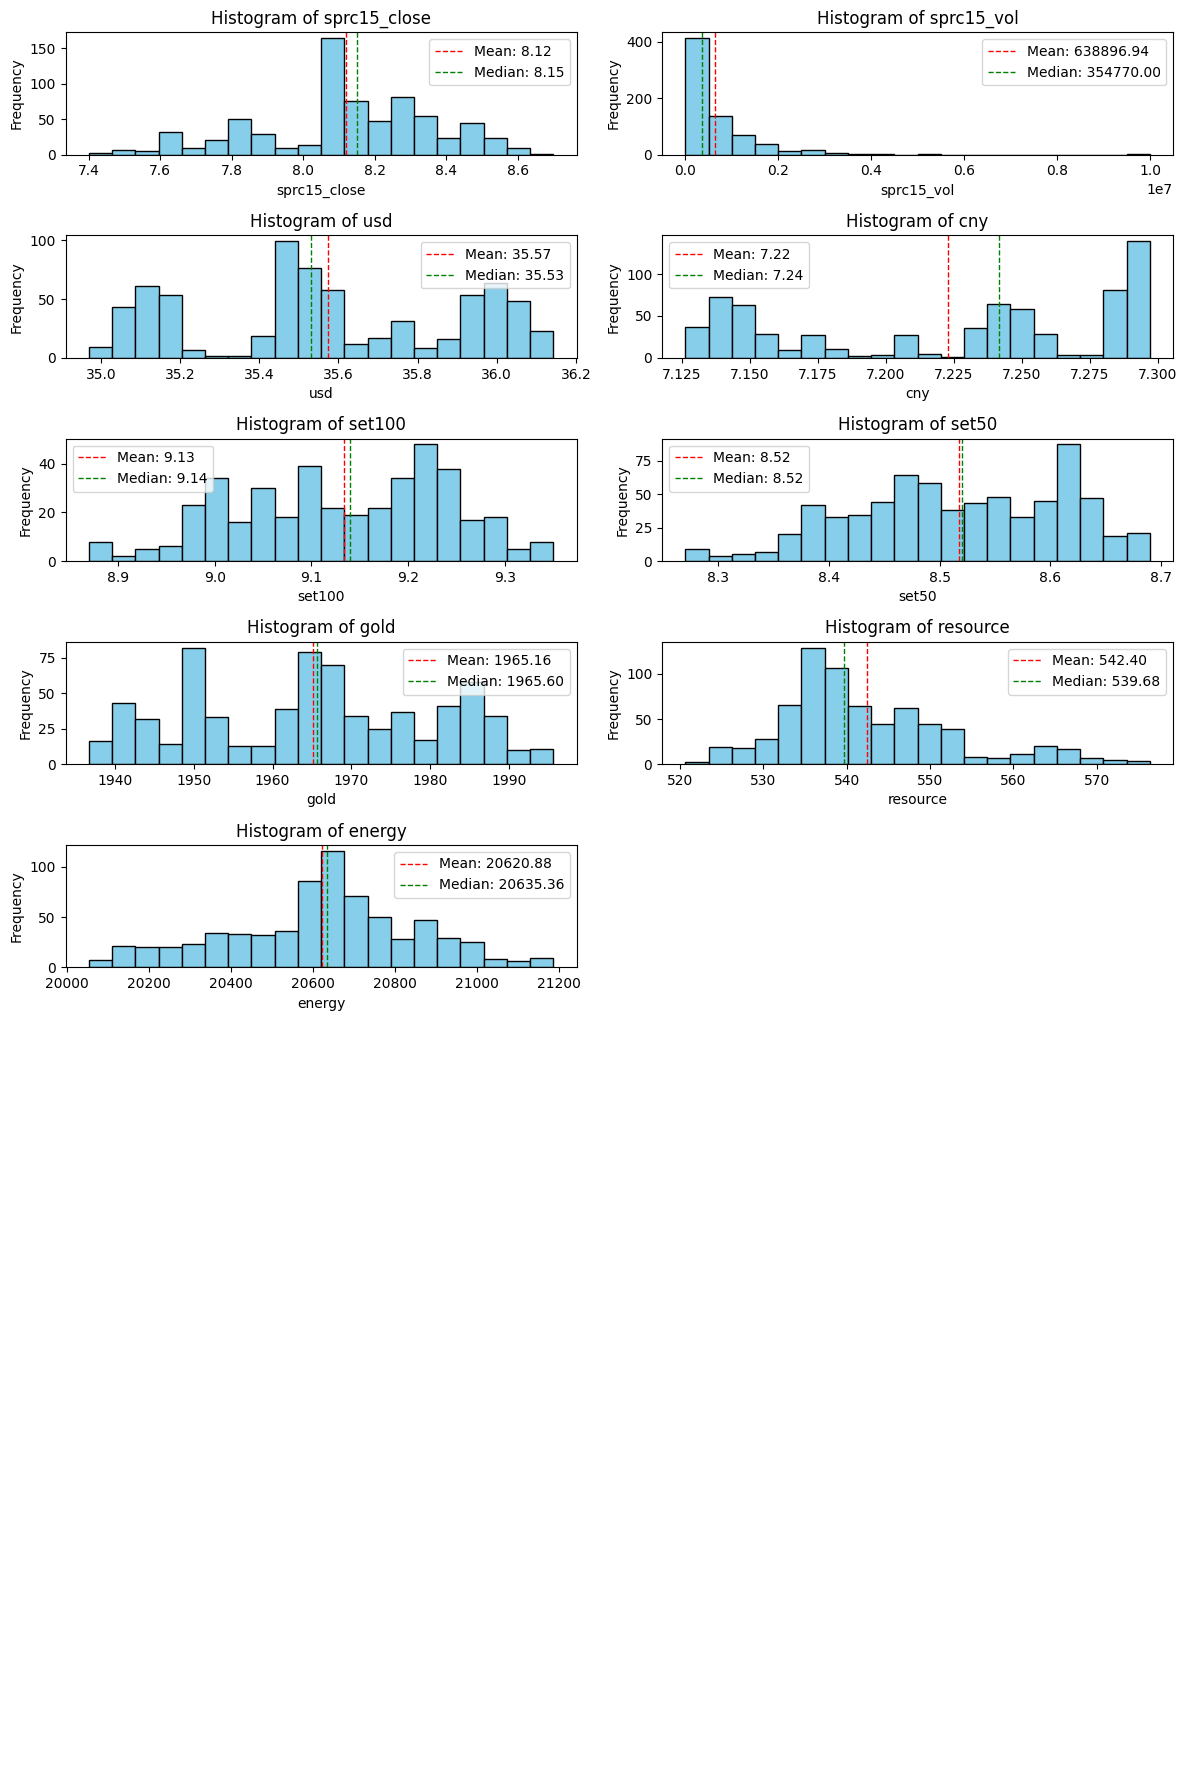

In [40]:
## Check Skewness
columns = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

fig, axs = plt.subplots(9, 2, figsize=(12, 18))

# Flatten the 2D array of axes to simplify indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].hist(merged_data[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {column}')

    mean_val = merged_data[column].mean()
    median_val = merged_data[column].median()

    axs[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
    axs[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
    axs[i].legend()

# Hide any unused subplots
for i in range(len(columns), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

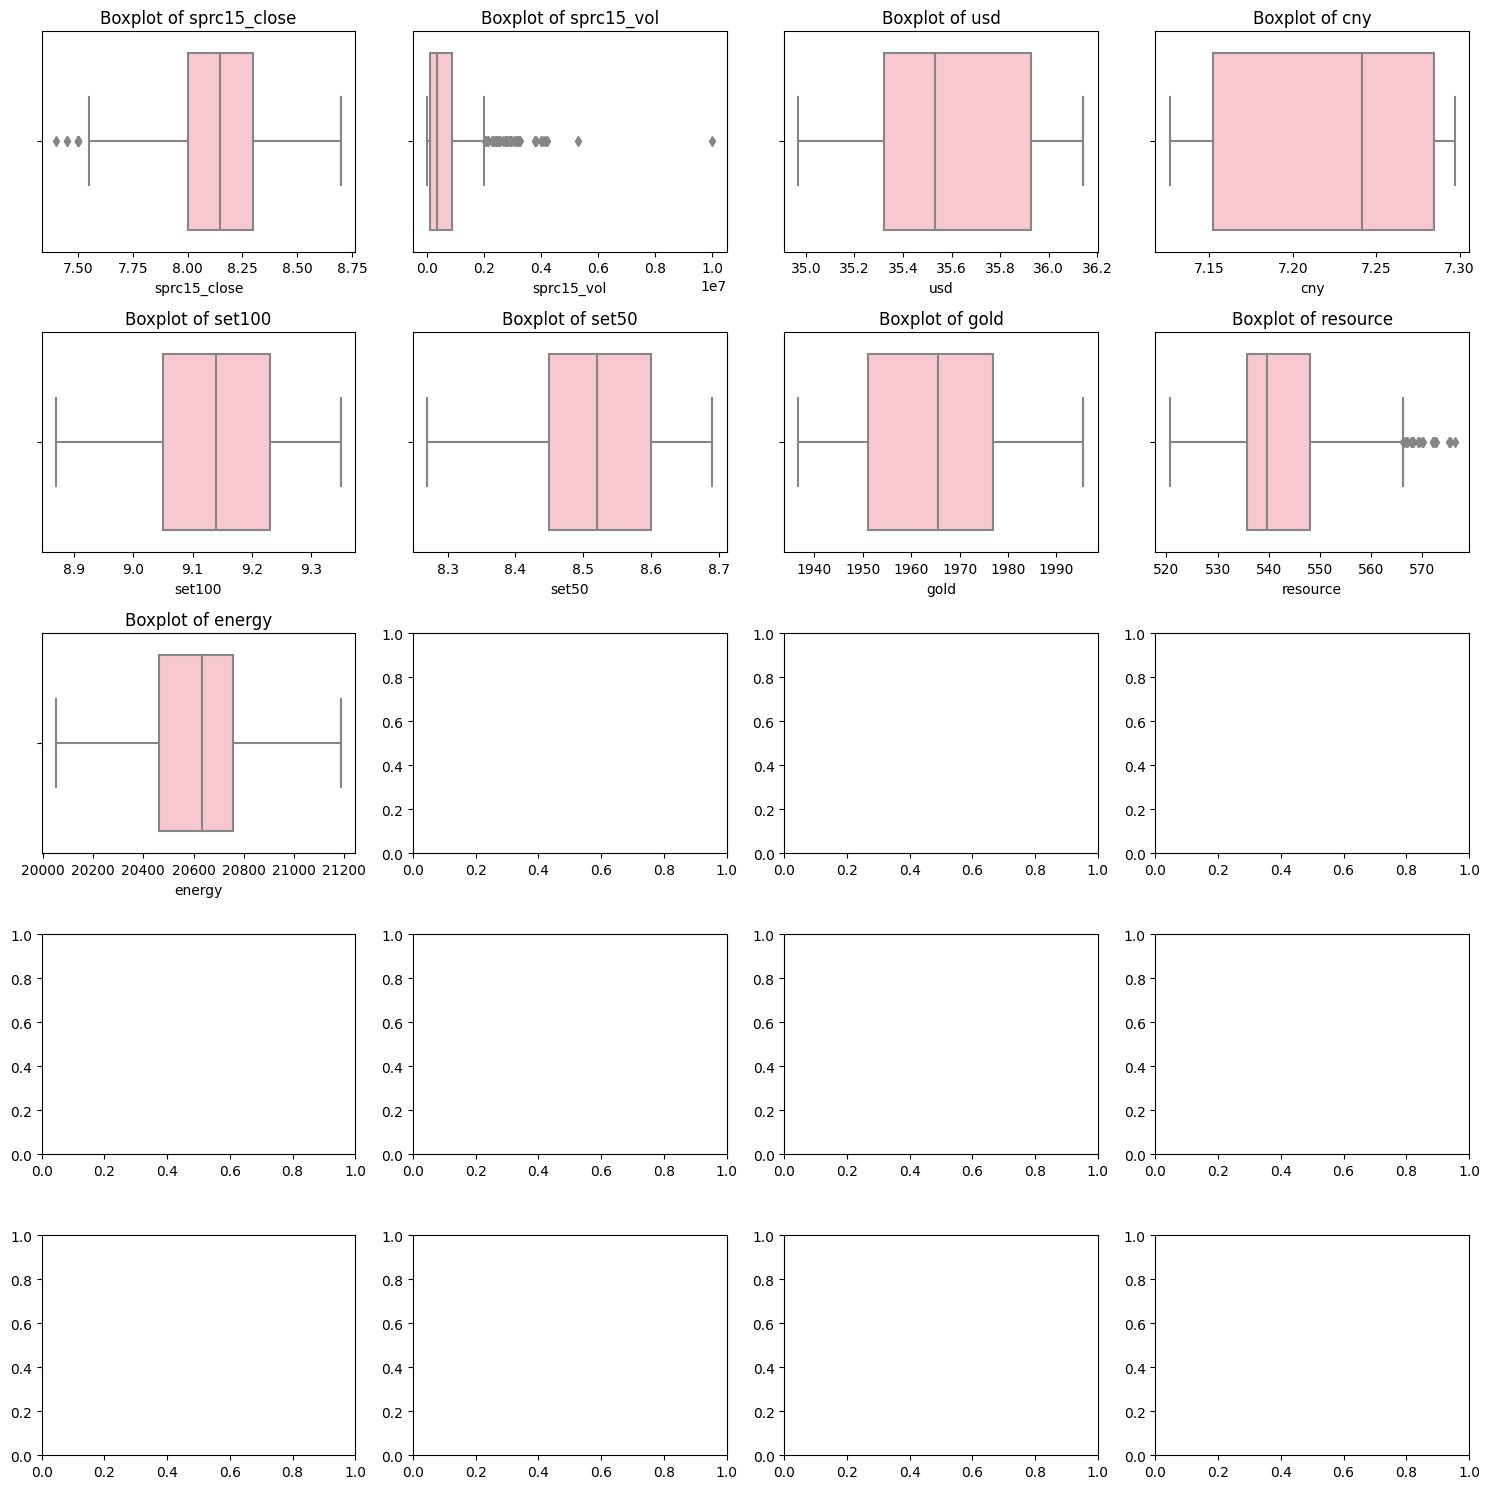

In [41]:
# Check Outliers
fig, axs = plt.subplots(5, 4, figsize=(15, 15))

columns_to_test = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

color = 'pink'

for i, column in enumerate(columns_to_test):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=merged_data[column], color=color)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Cleansing Data

In [42]:
columns_to_fillna = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

for column in columns_to_fillna:
    median_value = merged_data[column].median()
    merged_data[column].fillna(median_value, inplace=True)

In [43]:
columns_to_test = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

for column_name in columns_to_test:
    df_tmp = merged_data[[column_name]].dropna()

    print(f'{column_name} : ', end='')

    # Perform Anderson-Darling test for normality
    statistic, critical_values, significance_levels = stats.anderson(df_tmp[column_name], dist='norm')
    print(f'Statistic: {statistic:.3f}, Critical Values: {critical_values}, Significance Levels: {significance_levels}')

    # Check normality based on the 5% significance level
    if statistic >= critical_values[2]:
        print('Not normal')
    else:
        print('Normal')

    print('==========================================')

sprc15_close : Statistic: 6.978, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
sprc15_vol : Statistic: 52.385, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
usd : Statistic: 15.056, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
cny : Statistic: 36.815, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
set100 : Statistic: 26.626, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
set50 : Statistic: 6.899, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
gold : Statistic: 7.769, Critical Values: [0.573 0.652 0.783 0.913 1.086], Significance Levels: [15.  10.   5.   2.5  1. ]
Not normal
resource : Statistic: 14.924, Critical Valu

# Feature Selection

## SPRC

### SPRC Data Preparation

In [44]:
# Assuming all your data frames have the same index (timestamps)
keys = ['ref_date','sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy','sprc15_signal']

# Assuming tisco15_close has Datetime index
reference_index = ref_date.index

# Concatenate and reindex based on the reference index
merged_data_SPRC = pd.concat([ref_date, sprc15_close, sprc15_vol, usd ,cny, set100, set50, gold, resource, energy,sprc15_signal], axis=1, keys=keys).reindex(reference_index)

In [45]:
columns_to_fillna = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

for column in columns_to_fillna:
    median_value = merged_data_SPRC[column].median()
    merged_data_SPRC[column].fillna(median_value, inplace=True)

In [46]:
sprc2_close = SPRC_2m_df['Close']
sprc5_close = SPRC_5m_df['Close']

keys = ['ref_date', 'sprc2_close', 'sprc5_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

reference_index = ref_date.index


merged_sprc_new = pd.concat([ref_date, sprc2_close, sprc5_close, sprc15_vol, usd ,cny, set100, set50, gold, resource, energy], axis=1, keys=keys).reindex(reference_index)
merged_sprc_new

NameError: name 'SPRC_2m_df' is not defined

In [ ]:
columns_to_fillna = ['sprc2_close', 'sprc5_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy']

for column in columns_to_fillna:
    median_value = merged_sprc_new[column].median()
    merged_sprc_new[column].fillna(median_value, inplace=True)

### Technical Features

#### 15m

In [ ]:
# SPRC EMA 15m
# Calculate Exponential Moving Averages (EMA) with a window of 15 periods (15 minutes in this case)
merged_data_SPRC['ema_15m'] = talib.EMA(merged_data_SPRC['sprc15_close'], timeperiod=15)

# Create Label (target variable)
merged_data_SPRC['target_ema_15m'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# Replace missing values in 'ema' with forward fill
merged_data_SPRC['ema_15m'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_data_SPRC['target_ema_15m'].fillna(method='ffill', inplace=True)


# SPRC MACD 15m
merged_data_SPRC['macd_15m'], merged_data_SPRC['signal_macd_15m'], _ = talib.MACD(merged_data_SPRC['sprc15_close'], fastperiod=12, slowperiod=26, signalperiod=9)
merged_data_SPRC[['macd_15m', 'signal_macd_15m']] = merged_data_SPRC[['macd_15m', 'signal_macd_15m']].fillna(method='ffill')

# Create Label (target variable)
merged_data_SPRC['target_macd_15m'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# Replace missing values in 'target' with forward fill (if any)
merged_data_SPRC['target_macd_15m'].fillna(method='ffill', inplace=True)


# SPRC RSI 15m
# Calculate Relative Strength Index (RSI) with a window of 14 periods
merged_data_SPRC['rsi_15'] = talib.RSI(merged_data_SPRC['sprc15_close'], timeperiod=14)

# Create Label (target variable)
merged_data_SPRC['target_rsi_15'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# Replace missing values in 'rsi' with forward fill
merged_data_SPRC['rsi_15'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_data_SPRC['target_rsi_15'].fillna(method='ffill', inplace=True)


# SPRC OBV 15m
merged_data_SPRC['obv'] = talib.OBV(merged_data_SPRC['sprc15_close'], merged_data_SPRC['sprc15_vol'])

##### EMA

In [ ]:
# # SPRC EMA 15m
# # Calculate Exponential Moving Averages (EMA) with a window of 15 periods (15 minutes in this case)
# merged_data_SPRC['ema_15m'] = talib.EMA(merged_data_SPRC['sprc15_close'], timeperiod=15)

# # Create Label (target variable)
# merged_data_SPRC['target_ema_15m'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# # Replace missing values in 'ema' with forward fill
# merged_data_SPRC['ema_15m'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_data_SPRC['target_ema_15m'].fillna(method='ffill', inplace=True)

# print(merged_data_SPRC[['ema_15m']])


# # Verify the shapes of features and target
# print("Shape of features:",merged_data_SPRC[['ema_15m']].shape)
# print("Shape of target:",merged_data_SPRC['target_ema_15m'].shape)

# # Plotting the EMA_15m
# plt.figure(figsize=(10, 6))
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['sprc15_close'], label='SPRC 15 Close')
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['ema_15m'], label='SPRC (15 periods)')
# plt.title('SPRC 15 Close and Exponential Moving Average (EMA)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

##### MACD

In [ ]:
# # SPRC MACD 15m
# merged_data_SPRC['macd_15m'], merged_data_SPRC['signal_macd_15m'], _ = talib.MACD(merged_data_SPRC['sprc15_close'], fastperiod=12, slowperiod=26, signalperiod=9)
# merged_data_SPRC[['macd_15m', 'signal_macd_15m']] = merged_data_SPRC[['macd_15m', 'signal_macd_15m']].fillna(method='ffill')

# # Create Label (target variable)
# merged_data_SPRC['target_macd_15m'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# # Replace missing values in 'target' with forward fill (if any)
# merged_data_SPRC['target_macd_15m'].fillna(method='ffill', inplace=True)

# print(merged_data_SPRC[['macd_15m', 'signal_macd_15m']])

# # Verify the shapes of features and target
# print("Shape of features:", merged_data_SPRC[['macd_15m', 'signal_macd_15m']].shape)
# print("Shape of target:", merged_data_SPRC['target_macd_15m'].shape)

# # Plotting the MACD alongside Tisco15 Close
# plt.figure(figsize=(10, 6))
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['sprc15_close'], label='SPRC 15 Close')
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['macd_15m'], label='MACD (12,26,9)')
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['signal_macd_15m'], label='Signal Line (MACD)')
# plt.title('SPRC 15 Close, MACD, and Signal Line')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

##### RSI

In [ ]:
# # SPRC RSI 15m
# # Calculate Relative Strength Index (RSI) with a window of 14 periods
# merged_data_SPRC['rsi_15'] = talib.RSI(merged_data_SPRC['sprc15_close'], timeperiod=14)

# # Create Label (target variable)
# merged_data_SPRC['target_rsi_15'] = np.where(merged_data_SPRC['sprc15_close'].shift(-1) > merged_data_SPRC['sprc15_close'], 1, 0)

# # Replace missing values in 'rsi' with forward fill
# merged_data_SPRC['rsi_15'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_data_SPRC['target_rsi_15'].fillna(method='ffill', inplace=True)

# print(merged_data_SPRC[['rsi_15']])

# # Verify the shapes of features and target
# print("Shape of features:", merged_data_SPRC[['rsi_15']].shape)
# print("Shape of target:", merged_data_SPRC['target_rsi_15'].shape)

# # Plotting the 'tisco15_close' and RSI
# plt.figure(figsize=(10, 6))
# plt.plot(merged_data_SPRC.index, merged_data_SPRC['sprc15_close'], label='SPRC 15 Close')
# plt.title('SPRC 15 Close and Relative Strength Index (RSI)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(loc='upper left')

# # Create a secondary y-axis for RSI
# ax2 = plt.gca().twinx()
# ax2.plot(merged_data_SPRC.index, merged_data_SPRC['rsi_15'], color='orange', label='RSI')
# ax2.set_ylabel('RSI')
# ax2.legend(loc='upper right')

# plt.show()

##### OBV

In [ ]:
# # SPRC OBV 15m
# merged_data_SPRC['obv'] = talib.OBV(merged_data_SPRC['sprc15_close'], merged_data_SPRC['sprc15_vol'])

#### 2m

In [ ]:
# SPRC EMA 2m
# Calculate EMA with a window of period (minute)
merged_sprc_new['ema_2m'] = talib.EMA(merged_sprc_new['sprc2_close'], timeperiod=2)

# Create Label (target variable)
merged_sprc_new['target_ema_2m'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# Replace missing values in 'ema' with forward fill
merged_sprc_new['ema_2m'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_ema_2m'].fillna(method='ffill', inplace=True)

# SPRC MACD_2m
# Calculate MACD with forward-fill to handle NaN values
merged_sprc_new['macd_2m'], merged_sprc_new['signal_macd_2m'], _ = talib.MACD(merged_sprc_new['sprc2_close'], fastperiod=12, slowperiod=26, signalperiod=9)
merged_sprc_new[['macd_2m', 'signal_macd_2m']] = merged_sprc_new[['macd_2m', 'signal_macd_2m']].fillna(method='ffill')

# Create Label (target variable)
merged_sprc_new['target_macd_2m'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_macd_2m'].fillna(method='ffill', inplace=True)

# SPRC RSI 2m
# Calculate Relative Strength Index (RSI) with a window of 14 periods
merged_sprc_new['rsi_2'] = talib.RSI(merged_sprc_new['sprc2_close'], timeperiod=2)

# Create Label (target variable)
merged_sprc_new['target_rsi_2'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# Replace missing values in 'rsi' with forward fill
merged_sprc_new['rsi_2'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_rsi_2'].fillna(method='ffill', inplace=True)


# SPRC OBV 2m
# merged_sprc_new['obv_2m'] = talib.OBV(merged_data_SPRC['sprc15m_close'], merged_data_SPRC['sprc15m_vol'])
# SPRC OBV 2m
merged_sprc_new['obv_2m'] = talib.OBV(SPRC_2m['Close'], SPRC_2m['Volume'])

##### EMA

In [ ]:
# # SPRC EMA 2m
# # Calculate EMA with a window of period (minute)
# merged_sprc_new['ema_2m'] = talib.EMA(merged_sprc_new['sprc2_close'], timeperiod=2)

# # Create Label (target variable)
# merged_sprc_new['target_ema_2m'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# # Replace missing values in 'ema' with forward fill
# merged_sprc_new['ema_2m'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_ema_2m'].fillna(method='ffill', inplace=True)

# print(merged_sprc_new[['ema_2m']])

# # Plotting the EMA_2m
# plt.figure(figsize=(10, 6))
# plt.plot(merged_sprc_new.index, merged_sprc_new['sprc2_close'], label='SPRC 2 Close')
# plt.plot(merged_sprc_new.index, merged_sprc_new[['ema_2m']], label='EMA (2 periods)')

# plt.title('SPRC Close and Exponential Moving Average (EMA)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

##### MACD

In [ ]:
# # SPRC MACD_2m
# # Calculate MACD with forward-fill to handle NaN values
# merged_sprc_new['macd_2m'], merged_sprc_new['signal_macd_2m'], _ = talib.MACD(merged_sprc_new['sprc2_close'], fastperiod=12, slowperiod=26, signalperiod=9)
# merged_sprc_new[['macd_2m', 'signal_macd_2m']] = merged_sprc_new[['macd_2m', 'signal_macd_2m']].fillna(method='ffill')

# # Create Label (target variable)
# merged_sprc_new['target_macd_2m'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_macd_2m'].fillna(method='ffill', inplace=True)

# print(merged_sprc_new[['macd_2m', 'signal_macd_2m']])

# # Verify the shapes of features and target
# print("Shape of features:", merged_sprc_new[['macd_2m', 'signal_macd_2m']].shape)
# print("Shape of target:", merged_sprc_new['target_macd_2m'].shape)

# # Plotting the MACD alongside sprc2 Close
# plt.figure(figsize=(10, 6))
# plt.plot(merged_sprc_new.index, merged_sprc_new['sprc2_close'], label='SPRC 2 Close')
# plt.plot(merged_sprc_new.index, merged_sprc_new['macd_2m'], label='MACD (12,26,9)')
# plt.plot(merged_sprc_new.index, merged_sprc_new['signal_macd_2m'], label='Signal Line (MACD)')
# plt.title('SPRC 2 Close, MACD, and Signal Line')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

##### RSI

In [ ]:
# # Calculate Relative Strength Index (RSI) with a window of 14 periods
# merged_sprc_new['rsi_2'] = talib.RSI(merged_sprc_new['sprc2_close'], timeperiod=2)

# # Create Label (target variable)
# merged_sprc_new['target_rsi_2'] = np.where(merged_sprc_new['sprc2_close'].shift(-1) > merged_sprc_new['sprc2_close'], 1, 0)

# # Replace missing values in 'rsi' with forward fill
# merged_sprc_new['rsi_2'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_rsi_2'].fillna(method='ffill', inplace=True)

# print(merged_sprc_new[['rsi_2']])

# # Verify the shapes of features and target
# print("Shape of features:", merged_sprc_new[['rsi_2']].shape)
# print("Shape of target:", merged_sprc_new['target_rsi_2'].shape)

# # Plotting the 'sprc2_close' and RSI
# plt.figure(figsize=(10, 6))
# plt.plot(merged_sprc_new.index, merged_sprc_new['sprc2_close'], label='SPRC 2 Close')
# plt.title('SPRC 2 Close and Relative Strength Index (RSI)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(loc='upper left')

# # Create a secondary y-axis for RSI
# ax2 = plt.gca().twinx()
# ax2.plot(merged_sprc_new.index, merged_sprc_new['rsi_2'], color='orange', label='RSI')
# ax2.set_ylabel('RSI')
# ax2.legend(loc='upper right')
# plt.show()

##### OBV

In [ ]:
# # SPRC OBV 2m
# merged_sprc_new['obv_2m'] = talib.OBV(SPRC_2m['Close'], SPRC_2m['Volume'])

#### 5m

In [ ]:
# SPRC EMA 5m
# Calculate EMA with a window of period (minute)
merged_sprc_new['ema_5m'] = talib.EMA(merged_sprc_new['sprc5_close'], timeperiod=5)

# Create Label (target variable)
merged_sprc_new['target_ema_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# Replace missing values in 'ema' with forward fill
merged_sprc_new['ema_5m'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_ema_5m'].fillna(method='ffill', inplace=True)


#SPRC MACD 5m
# Calculate MACD with forward-fill to handle NaN values
merged_sprc_new['macd_5m'], merged_sprc_new['signal_macd_5m'], _ = talib.MACD(merged_sprc_new['sprc5_close'], fastperiod=12, slowperiod=26, signalperiod=9)
merged_sprc_new[['macd_5m', 'signal_macd_5m']] = merged_sprc_new[['macd_5m', 'signal_macd_5m']].fillna(method='ffill')

# Create Label (target variable)
merged_sprc_new['target_macd_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_macd_5m'].fillna(method='ffill', inplace=True)


# SPRC RSI 5m
# Calculate Relative Strength Index (RSI) with a window of 14 periods
merged_sprc_new['rsi_5'] = talib.RSI(merged_sprc_new['sprc5_close'], timeperiod=5)

# Create Label (target variable)
merged_sprc_new['target_rsi_5'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# Replace missing values in 'rsi' with forward fill
merged_sprc_new['rsi_5'].fillna(method='ffill', inplace=True)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_rsi_5'].fillna(method='ffill', inplace=True)


# SPRC OBV 5m
merged_sprc_new['obv_5m'] = talib.OBV(SPRC_5m['Close'], SPRC_5m['Volume'])

##### EMA

In [ ]:
# # SPRC EMA 5m
# # Calculate EMA with a window of period (minute)
# merged_sprc_new['ema_5m'] = talib.EMA(merged_sprc_new['sprc5_close'], timeperiod=5)

# # Create Label (target variable)
# merged_sprc_new['target_ema_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# # Replace missing values in 'ema' with forward fill
# merged_sprc_new['ema_5m'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_ema_5m'].fillna(method='ffill', inplace=True)

# print(merged_sprc_new[['ema_5m']])

# # Plotting the EMA_5m
# plt.figure(figsize=(10, 6))
# plt.plot(merged_sprc_new.index, merged_sprc_new['sprc5_close'], label='SPRC 5 Close')
# plt.plot(merged_sprc_new.index, merged_sprc_new[['ema_5m']], label='EMA (5 periods)')

# plt.title('SPRC Close and Exponential Moving Average (EMA)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

##### MACD

In [ ]:
# SPRC MACD 5m
# Calculate MACD with forward-fill to handle NaN values
merged_sprc_new['macd_5m'], merged_sprc_new['signal_macd_5m'], _ = talib.MACD(merged_sprc_new['sprc5_close'], fastperiod=12, slowperiod=26, signalperiod=9)
merged_sprc_new[['macd_5m', 'signal_macd_5m']] = merged_sprc_new[['macd_5m', 'signal_macd_5m']].fillna(method='ffill')

# Create Label (target variable)
merged_sprc_new['target_macd_5m'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# Replace missing values in 'target' with forward fill (if any)
merged_sprc_new['target_macd_5m'].fillna(method='ffill', inplace=True)

print(merged_sprc_new[['macd_5m', 'signal_macd_5m']])

# Verify the shapes of features and target
print("Shape of features:", merged_sprc_new[['macd_5m', 'signal_macd_5m']].shape)
print("Shape of target:", merged_sprc_new['target_macd_5m'].shape)

# Plotting the MACD alongside sprc5 Close
plt.figure(figsize=(10, 6))
plt.plot(merged_sprc_new.index, merged_sprc_new['sprc5_close'], label='SPRC 5 Close')
plt.plot(merged_sprc_new.index, merged_sprc_new['macd_5m'], label='MACD (12,26,9)')
plt.plot(merged_sprc_new.index, merged_sprc_new['signal_macd_5m'], label='Signal Line (MACD)')
plt.title('SPRC 5 Close, MACD, and Signal Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

##### RSI

In [ ]:
# # SPRC RSI 5m
# # Calculate Relative Strength Index (RSI) with a window of 14 periods
# merged_sprc_new['rsi_5'] = talib.RSI(merged_sprc_new['sprc5_close'], timeperiod=5)

# # Create Label (target variable)
# merged_sprc_new['target_rsi_5'] = np.where(merged_sprc_new['sprc5_close'].shift(-1) > merged_sprc_new['sprc5_close'], 1, 0)

# # Replace missing values in 'rsi' with forward fill
# merged_sprc_new['rsi_5'].fillna(method='ffill', inplace=True)

# # Replace missing values in 'target' with forward fill (if any)
# merged_sprc_new['target_rsi_5'].fillna(method='ffill', inplace=True)

# print(merged_sprc_new[['rsi_5']])

# # Verify the shapes of features and target
# print("Shape of features:", merged_sprc_new[['rsi_5']].shape)
# print("Shape of target:", merged_sprc_new['target_rsi_5'].shape)

# # Plotting the 'sprc5_close' and RSI
# plt.figure(figsize=(10, 6))
# plt.plot(merged_sprc_new.index, merged_sprc_new['sprc5_close'], label='SPRC 5 Close')
# plt.title('SPRC 5 Close and Relative Strength Index (RSI)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(loc='upper left')

# # Create a secondary y-axis for RSI
# ax2 = plt.gca().twinx()
# ax2.plot(merged_sprc_new.index, merged_sprc_new['rsi_5'], color='orange', label='RSI')
# ax2.set_ylabel('RSI')
# ax2.legend(loc='upper right')
# plt.show()

##### OBV

In [ ]:
# SPRC OBV 5m
merged_sprc_new['obv_5m'] = talib.OBV(SPRC_5m['Close'], SPRC_5m['Volume'])

### Fill Null Value

In [ ]:
columns_to_fillna = ['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy','ema_15m','macd_15m','rsi_15', 'obv']

for column in columns_to_fillna:
    median_value = merged_data_SPRC[column].median()
    merged_data_SPRC[column].fillna(median_value, inplace=True)

### Correlations

In [ ]:
correlations = merged_data_SPRC.corr()['sprc15_close']

print("Correlation with sprc15_close:")
print(correlations)

print("\nInterpretation:")
for variable, correlation in correlations.items():
    if correlation > 0.7 or correlation < -0.7:
        print(f"The correlation between 'sprc15_close' and '{variable}' is strong ({correlation:.2f})")
    elif 0.3 <= correlation <= 0.7 or -0.7 <= correlation <= -0.3:
        print(f"The correlation between 'sprc15_close' and '{variable}' is moderate ({correlation:.2f})")
    elif 0.1 <= correlation <= 0.3 or -0.3 <= correlation <= -0.1:
        print(f"The correlation between 'sprc15_close' and '{variable}' is weak ({correlation:.2f})")
    else:
        print(f"There is no significant correlation between 'sprc15_close' and '{variable}' ({correlation:.2f})")

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data_SPRC.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat Map of merged_data_SRPC')

plt.show()

### Standardization

In [ ]:
# Specify the columns you want to normalize
columns_to_normalize = ['sprc15_close', 'cny', 'set50', 'energy','ema_15m','macd_15m','rsi_15', 'obv']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the specified columns
merged_data_SPRC[columns_to_normalize] = scaler.fit_transform(merged_data_SPRC[columns_to_normalize])

In [ ]:
# Assuming merged_data_SRPC is a DataFrame
# filtered_data_SPRC = merged_data_SPRC[['ref_date', 'sprc15_close', 'cny', 'set50', 'energy','ema_15m','macd_15m','rsi_15','sprc15_signal']]
# filtered_data_SPRC = merged_data_SPRC[['ref_date', 'sprc15_close', 'cny', 'set50', 'energy','sprc15_signal']]
filtered_data_SPRC = merged_data_SPRC[['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy','ema_15m','macd_15m','rsi_15', 'sprc15_signal', 'obv']]
# filtered_data_SPRC = merged_data_SPRC[['ref_date', 'sprc15_close', 'cny', 'set50', 'energy','ema_15m','rsi_15','sprc15_signal']]
filtered_data_SPRC

# Model Development (Training)

### SRPC

In [ ]:
X_train_df = filtered_data_SPRC[['sprc15_close', 'cny', 'set50', 'energy','ema_15m','rsi_15', 'obv']]
# X_train_df = filtered_data_SPRC[['sprc15_close', 'sprc15_vol', 'usd', 'cny', 'set100', 'set50', 'gold', 'resource', 'energy','ema_15m','macd_15m','rsi_15', 'obv']]
# X_train_df = filtered_data_SPRC[['sprc15_close', 'cny', 'set50', 'energy']]
y_train_df = filtered_data_SPRC[['sprc15_signal']]
y_train_df.fillna(0, inplace=True)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state=123, stratify=y_train_df)


# set parameter
y_train = y_train.values.ravel()
k = 5
auc_scorer = make_scorer(roc_auc_score, greater_is_better = True, average= 'macro',multi_class='ovr',needs_proba=True)

# 1. Logistic regression
lgr = LogisticRegression(solver='liblinear')
param_grid_lgr = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid_search_lgr = GridSearchCV(estimator=lgr, param_grid=param_grid_lgr, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_lgr.fit(X_train, y_train)


# 2. Extreme Gradient Boosting (XGBoost)
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_xgb.fit(X_train, y_train)


# 3. SVM Support Vector Machine (SVM)
svm = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_svm.fit(X_train, y_train)


# 4. Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_rf.fit(X_train, y_train)


# 5. Decision tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=k, scoring=auc_scorer, return_train_score=False, verbose=1)
grid_search_dt.fit(X_train, y_train)


## Model Evaluation (Testing Model)

In [ ]:
# Prediction
# Confusion Matrix and AUC Calculation

# 1. Logistic regression

y_prob_lgr = grid_search_lgr.predict_proba(X_test)
auc_lgr = roc_auc_score(y_test, y_prob_lgr, multi_class='ovr') * 100

y_pred_lgr = grid_search_lgr.predict(X_test)
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)

print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lgr)
print(f"Logistic Regression AUC Score: {auc_lgr:.2f}%")


# 2. Extreme Gradient Boosting (XGBoost)

y_prob_xgb = grid_search_xgb.predict_proba(X_test)
auc_xgb = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr') * 100

y_pred_xgb = grid_search_xgb.predict(X_test)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\nExtreme Gradient Boostingn Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Extreme Gradient Boosting AUC Score: {auc_xgb:.2f}%")

# 3. SVM

y_prob_svm = grid_search_svm.predict_proba(X_test)
auc_svm = roc_auc_score(y_test, y_prob_svm, multi_class='ovr') * 100

y_pred_svm = grid_search_svm.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Confusion Matrix:")
print(conf_matrix_svm)
print(f"SVM AUC Score: {auc_svm:.2f}%")


# 4. Random forest

y_prob_rf = grid_search_rf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr') * 100

y_pred_rf = grid_search_rf.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom forest Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random forest AUC Score: {auc_rf:.2f}%")


# 5. Decision tree

y_prob_dt = grid_search_dt.predict_proba(X_test)
auc_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr') * 100

y_pred_dt = grid_search_dt.predict(X_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision tree AUC Score: {auc_dt:.2f}%")

## Deployment (Prediction)

In [ ]:
# Select the best score Model

## Submission

In [ ]:
# Output
submission = pd.DataFrame({"Id":range(1,301),"Expected":result}) # To be revised
print(submission.shape)
print(submission.head())
submission.to_csv("submission.csv", index=False)